In [1]:
(ext:chdir "~/Development/clasp/extensions/cando/src/lisp/tests/boron/" t)

-1

In [28]:
(leap.core::clear-path)
(add-path "~/Development/cando/extensions/cando/src/tests/boron/")
(add-path "~/Development/amber16/dat/leap/cmd/")
(add-path "~/Development/amber16/dat/leap/lib/")
(add-path "~/Development/amber16/dat/leap/parm/")
(add-path "~/Development/amber16/dat/leap/prep/")
(add-path "~/Development/amber16/dat/antechamber/")

(#P"/Users/meister/Development/amber16/dat/antechamber/"
 #P"/Users/meister/Development/amber16/dat/leap/prep/"
 #P"/Users/meister/Development/amber16/dat/leap/parm/"
 #P"/Users/meister/Development/amber16/dat/leap/lib/"
 #P"/Users/meister/Development/amber16/dat/leap/cmd/"
 #P"/Users/meister/Development/cando/extensions/cando/src/tests/boron/")

Load the GAFF force field and boronic ester frcmod file.

In [104]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")
(load-amber-params "gaff.dat")
(load-atom-type-rules "BORON.DEF")
(load-amber-params "frcmod.boronic-ester")
(gethash :default leap.core::*force-fields*)

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


(#<FORCE-FIELD frcmod.boronic-ester> #<FORCE-FIELD BORON.DEF>
 #<FORCE-FIELD gaff.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

Display a prototypical aryl boronic ester.

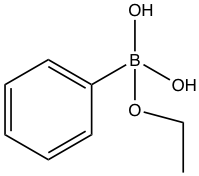

In [105]:
(cl-jupyter-user:png-from-file "arylboronate2d.png")

Load the arylboronic ester from a Chemdraw file.

In [106]:
(defparameter *chemagg* (cando:load-chem-draw-aggregate "arylboronate.cdxml"))

*CHEMAGG*

In [107]:
(build-hydrogens *chemagg*)

NIL

Draw the 2D representation of the molecule loaded from the Chemdraw file.

In [108]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [109]:
(:= *ff* (leap.core::merged-force-field))

SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb


*FF*

Automatically assign atom types.

In [110]:
(chem:assign-types *ff* *chemagg*)

NIL

In [111]:
(jostle *chemagg*)

NIL

Atomatically assign force-field parameters and minimize the energy of the molecule.

In [112]:
(energy:minimize *chemagg* :force-field *ff* :restraints-on nil)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          13135.937
 minSDnP       0     2  0.000362   0.0        2481773.429          13346.601
 minSDnP       0     3  0.000126   0.0        2109368.386           5383.795
 minSDnP       0     4  0.000662   0.0        1584114.660           5239.419
DONE absolute force test:
forceRmsMag(3444.606920).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     5  0.000000   0.0              0.000           3444.607
 minCGnP       0     6  0.000445  41.9        1063141.826           3096.023
 minCGnP       0     7  0.001025  54.2         711539.687           3115.778
 minCGnP       0     8  0.000405  61.9         548415.469           3123.848
 minCGnP       0     9  0.000278  54.8         467124.111           1577.835
 minCGnP       0    10  0.000446  80.3         414746.518 

#<ENERGY-FUNCTION >

Visualize the minimized structure and demonstrate that the force field parameters lead to the construction of a chemically reasonable structure.

In [113]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [114]:
(defparameter *cat* (cando:load-chem-draw-aggregate "spiroligomer transglycosylase copy.cdxml"))

*CAT*

In [117]:
(build-hydrogens *cat*)

NIL

In [118]:
(nglv::show-aggregate *cat*)

A Jupyter Widget

In [119]:
(progn
  (defparameter *stereocenters*
    (sort (cando:gather-stereocenters *cat*) #'string< :key #'chem:get-name))
  (cando:set-stereoisomer-func *stereocenters* (constantly :S) :show t)
  (let ((quat-matcher (core:make-cxx-object 'chem:chem-info)))
    (chem:compile-smarts quat-matcher "[C&H0&D4]")
    (chem:map-atoms nil (lambda (a) (when (chem:matches quat-matcher a)
                  (chem:set-configuration a :S)
                  (format t "Set atom ~a to :S~%" (chem:get-name a))))
            *cat*)))

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_160  S
C_183  S
C_185  S
C_208  S
C_210  S
C_303  S
C_305  S
C_313  S
C_315  S
C_323  S
C_325  S
C_333  S
C_335  S
C_343  S
C_345  S
C_500  S
Set atom C_305 to :S
Set atom C_315 to :S
Set atom C_325 to :S
Set atom C_210 to :S
Set atom C_335 to :S
Set atom C_185 to :S
Set atom C_345 to :S
Set atom C_160 to :S
Set atom C_135 to :S
Set atom C_110 to :S


NIL

In [120]:
(chem:assign-types *ff* *cat*)

NIL

In [121]:
(jostle *cat*)

NIL

In [122]:
(energy:minimize *cat* :force-field *ff* :restraints-on t)

SIMPLE-PROGRAM-ERROR: 
Could not find FFNonbondDb type index for type :B


NIL